# Libraries


In [ ]:

# sequence models LSTM , BiLSTM , GRU , RNN
## preprocessing : 
###stemming(snowball (talk about lancaster and porter)) vs  lematisation 
### stop words
# attention
## try lsm with attention
## Bert pretrained

In [1]:
! pip install -q kaggle
from google.colab import files

files.upload()

! mkdir ~/.kaggle

Saving kaggle.json to kaggle.json


In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d kazanova/sentiment140

 98% 79.0M/80.9M [00:04<00:00, 24.4MB/s]
100% 80.9M/80.9M [00:04<00:00, 19.1MB/s]


In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 

nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer,WordNetLemmatizer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.12.0


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
!unzip /content/sentiment140.zip

Archive:  /content/sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


#  Dataset Preprocessing

In [7]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Most columns are useless for our classification problem , so we will just drop them.

In [8]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

There are two sentiments as you can see below: postive with a value of 4 and negative with a value of 0. So we are in the case of a binary classification problem.


In [9]:
df.sentiment.value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

We replace the value 4 with 1 for positive sentiments .This will help us later when using sigmoid activation function which produces values from 0 (negative) to 1 (positive).

In [11]:
df.sentiment[df.sentiment==4]=1

<ipython-input-11-fa7b611df9e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sentiment[df.sentiment==4]=1


Text(0.5, 1.0, 'Sentiment Data Distribution')

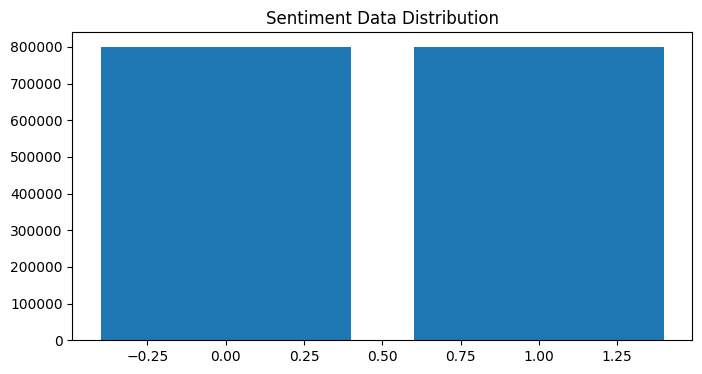

In [12]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

The data is well balanced. Thanks god!!!
And this is a sample of the data.

In [13]:
df.sample(n=5)

,sentiment,text
438275,0,@rob0_0 yeah cant believe we failed on mally &...
728201,0,@wendywings I know so unfair OH gets 2 that ye...
919498,1,@who_the_heck Haha LOL @ the english work they...
879477,1,"Zaki stood on a big nail today and is resting,..."
921161,1,"Stressed out about prom, partner is mildly inc..."


Since we get data from twitter, the quality of the text is very bad . We can see that there is a lot of ponctuations, urls, sepcial caracteres ,emoticons and emojis... Therefore , we need to preprocess the data.

# Text Preprocessing 


In [14]:
data=df.copy()

In [15]:
#we initialize our list of stop words
#initialize snowball stemmer which a better version of Porter stemmer 
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

# we eliminate twitter usersnames, urls and  any sequence of one or more characters that are not letters or digits.
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [16]:
#if stem == True : perform stemming
#if stem == False : perform lemmatisation
#if stem= None : perform neither stemming nor lemmatisation
def preprocess(text, stem=None):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem==True:
                tokens.append(stemmer.stem(token))

            elif stem==False:
                tokens.append(lemmatizer.lemmatize(token))
            else:
                tokens.append(token)
                
    return " ".join(tokens)

In [16]:
data['stem_text'] = data.text.apply(lambda x: preprocess(x,True))#cleaning and stemming
data['lema_text'] = data.text.apply(lambda x: preprocess(x,False))#cleaning and lemmatization
data['text_cleaned'] = data.text.apply(lambda x: preprocess(x,None))#cleaning only

In [17]:
data['text_cleaned'] = data.text.apply(lambda x: preprocess(x,None))#cleaning only

The data is now clean. Yay!!!

### Positive Words

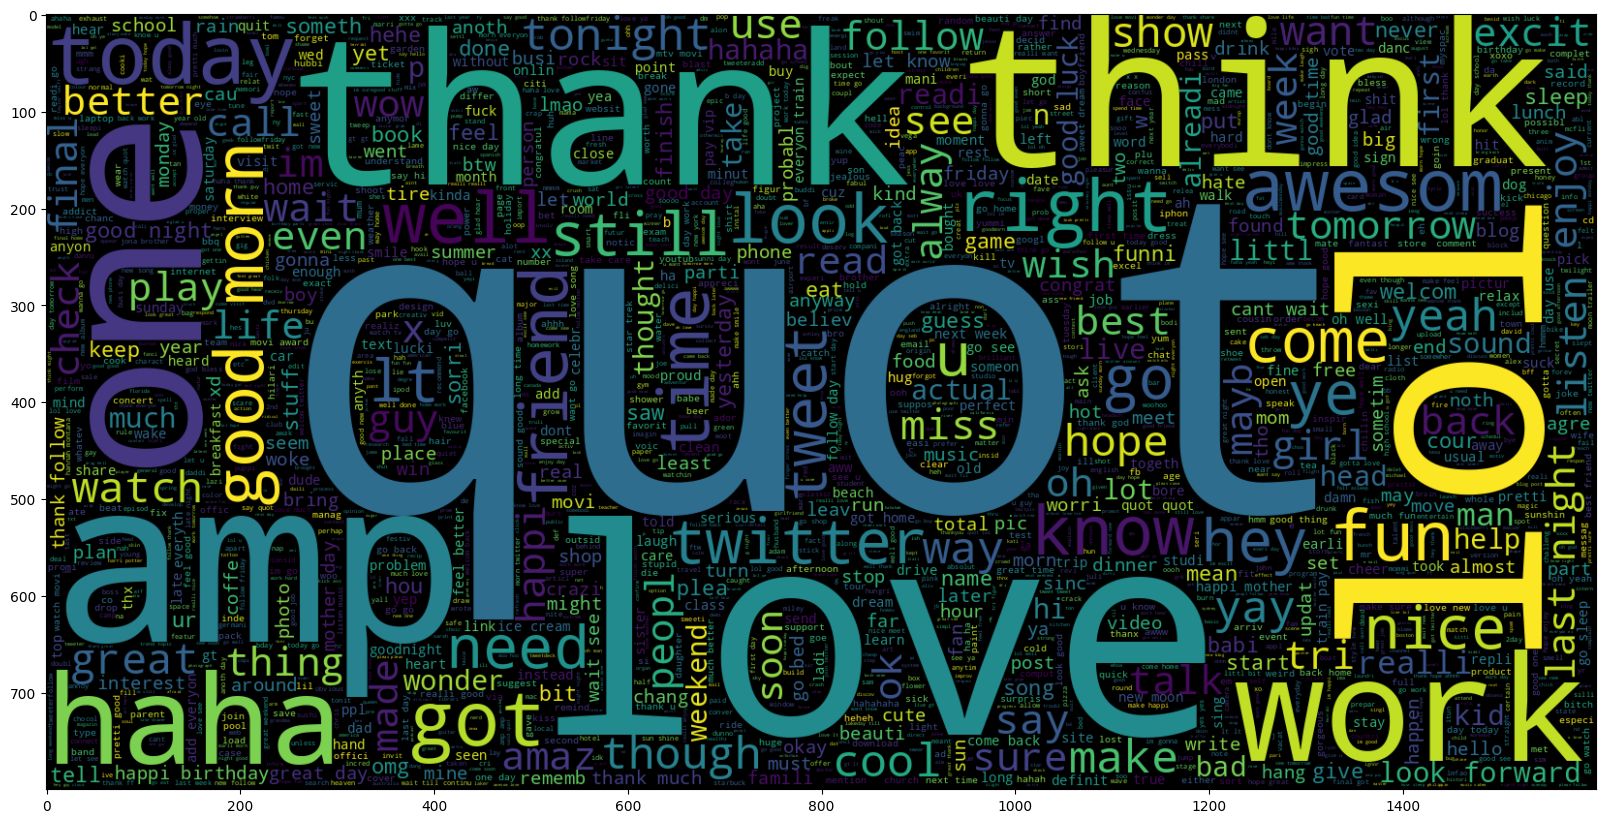

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 1].stem_text))
plt.imshow(wc , interpolation = 'bilinear')

### Negative Words

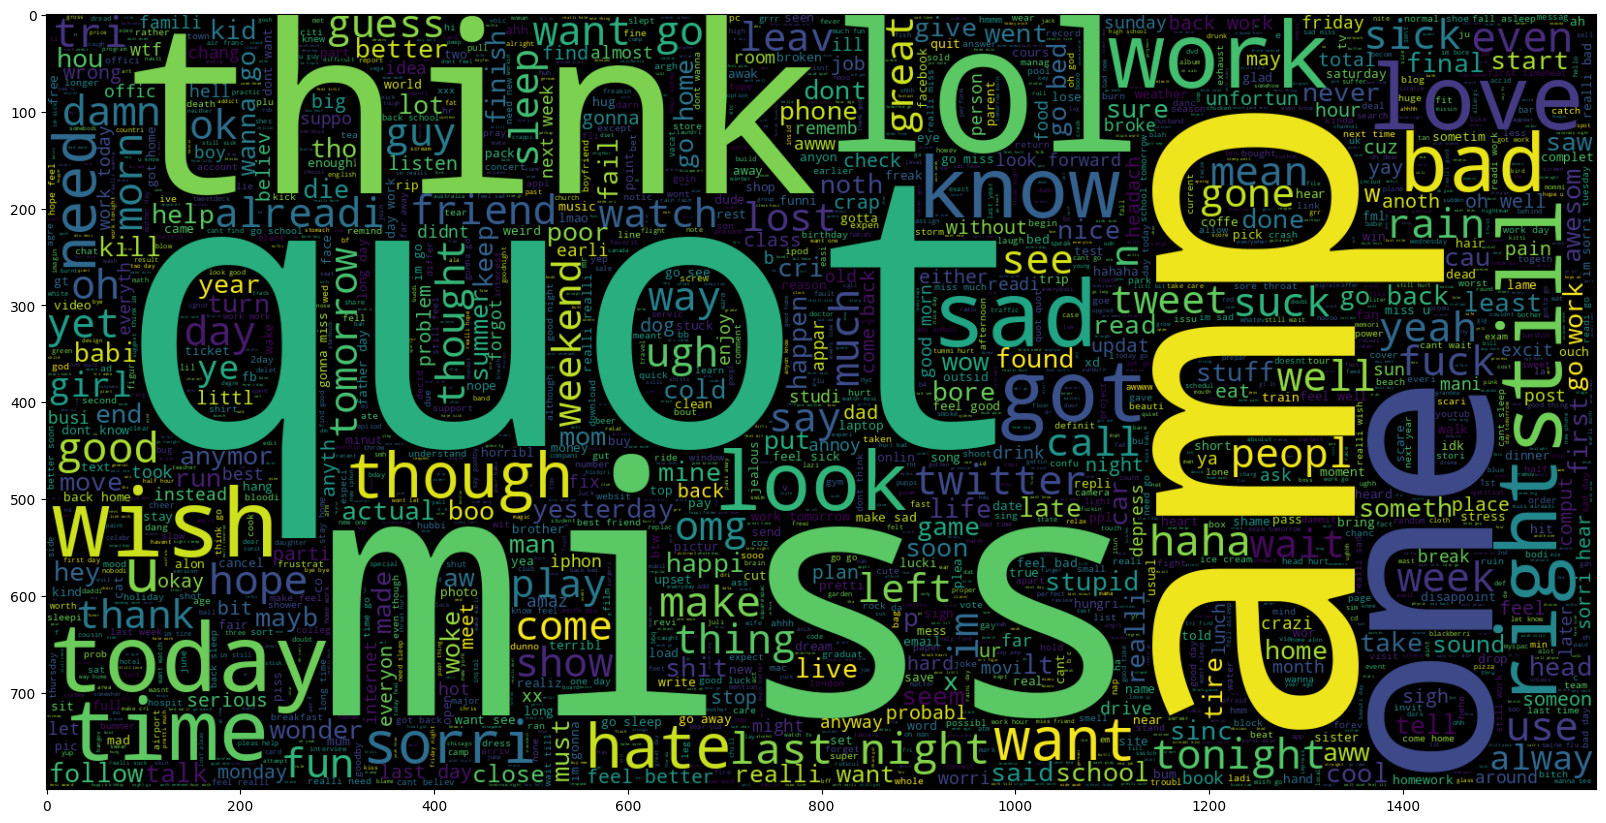

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.sentiment == 0].stem_text))
plt.imshow(wc , interpolation = 'bilinear')

## Train and Test Split

In [18]:
#size of the training set
TRAIN_SIZE = 0.8
#we we have more than MAX_NB_WORDS distinct word in our data then we only consider MAX_NB_WORDS words
# the others are set to None
MAX_NB_WORDS = 100000
#Since sentences have different length and our network accepts only data of the same length 
#we need to pad all sentences of a length of MAX_SEQUENCE_LENGTH
MAX_SEQUENCE_LENGTH = 30

In [19]:
train_data, test_data = train_test_split(data, test_size=1-TRAIN_SIZE,
                                         random_state=10) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


`train_test_split` will shuffle the dataset and split it to gives training and testing dataset. It's important to shuffle our dataset before training.

# Sequence models

In this part we will create a deep network that contains sequence models . We will test with different architectures : RNN , GRU , LSTM .

## Tokenization
Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called *tokens* , perhaps at the same time throwing away certain characters, such as punctuation. The process is called **Tokenization.**

`tokenizer` create tokens for every word in the data corpus and map them to a index using dictionary.

`word_index` contains the index for each word

`vocab_size` represents the total number of word in the data corpus

**Since we want to test the performance when using  lemmatization and stemming , we will have two tokenizers.**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer_stem = Tokenizer()
tokenizer_lema = Tokenizer()

tokenizer_stem.fit_on_texts(train_data.stem_text)
tokenizer_lema.fit_on_texts(train_data.lema_text)

word_index_stem = tokenizer_stem.word_index
word_index_lem = tokenizer_lema.word_index

vocab_size_stem = len(tokenizer_stem.word_index) + 1
vocab_size_lema = len(tokenizer_lema.word_index) + 1
print("Vocabulary Size when using Stemming:", vocab_size_stem)
print("Vocabulary Size when using Lemmatization:", vocab_size_lema)


Vocabulary Size when using Stemming: 248574
Vocabulary Size when using Lemmatization: 279383


When using Lemmatization we get more vocabulary than when using stemming because lemmatization is a more accurate method of reducing words to their base form . On the other hand, stemming uses a set of rules to reduce words to their base form, which may not always be accurate or contextually appropriate. This can lead to multiple words being mapped to the same stem, resulting in a smaller vocabulary compared to lemmatization.

In [ ]:
from tensorflow.keras.utils import pad_sequences

x_train_stem = pad_sequences(tokenizer_stem.texts_to_sequences(train_data.stem_text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test_stem = pad_sequences(tokenizer_stem.texts_to_sequences(test_data.stem_text),
                       maxlen = MAX_SEQUENCE_LENGTH)

x_train_lema = pad_sequences(tokenizer_lema.texts_to_sequences(train_data.lema_text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test_lema = pad_sequences(tokenizer_lema.texts_to_sequences(test_data.lema_text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train_stem.shape)
print("Testing X Shape:",x_test_stem.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


In [ ]:
labels = train_data.sentiment.unique().tolist()
labels

[0, 1]

### Label Encoding 
We are building the model to predict class in enocoded form (0 or 1 as this is a binary classification). We should encode our training labels to encodings.

In [ ]:
y_train = np.array(train_data.sentiment.to_list()).reshape(-1,1)
y_test = np.array(test_data.sentiment.to_list()).reshape(-1,1)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


## Word Emdedding (GloVe vs Word2Vec)


We download the pretrained glove and word2vec models.

In [ ]:
!wget http://vectors.nlpl.eu/repository/20/40.zip
!wget https://nlp.stanford.edu/data/glove.6B.zip

--2023-05-06 20:33:51--  http://vectors.nlpl.eu/repository/20/40.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.181
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3033545506 (2.8G) [application/zip]
Saving to: ‘40.zip’

40.zip              100%[===================>]   2.83G  22.7MB/s    in 2m 7s   

2023-05-06 20:35:59 (22.7 MB/s) - ‘40.zip’ saved [3033545506/3033545506]

--2023-05-06 20:35:59--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-05-06 20:35:59--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Conn

In [ ]:
!unzip glove.6B.zip
!unzip 40.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
Archive:  40.zip
  inflating: LIST                    
  inflating: meta.json               
  inflating: model.bin               
  inflating: model.txt               
  inflating: README                  


In [ ]:
GLOVE_EMB = 'glove.6B.100d.txt'
WORD2VEC_EMB = '/content/model.bin'
EMBEDDING_DIM = 100
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = 'best_model.hdf5'

In [ ]:
#in this function we will read the file of the pretrained word embedding to get embeddings_index
import zipfile
import gensim
def get_embeddings_index(path_embedding):
    embeddings_index = {}
    f = open(path_embedding)



    
    for line in f:
        values = line.split()
        word  = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()
    return embeddings_index
a=get_embeddings_index(GLOVE_EMB)
print('Found %s word vectors.' %len(a))

Found 400000 word vectors.


In [ ]:
def get_embedding_matrix(vocab_size,word_index,embeddings_index):
    embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [ ]:
import gc
gc.collect()

0

In [ ]:
def get_embedding_layer(path_embedding,vocab_size,word_index,word2vec=False,trainable=False):
    if not word2vec:
      embeddings_index=get_embeddings_index(path_embedding)
      embedding_matrix=get_embedding_matrix(vocab_size,word_index,embeddings_index)
    else:
      j=0
      
      model = gensim.models.KeyedVectors.load_word2vec_format(path_embedding, binary=True)
      embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
      for word, i in word_index.items():
            
           
            try:
              embedding_vector=model.get_vector(word)
              if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
            except:
              j+=1
      print("number of words that does not exist in word2vec: "+str(j))
    embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                              EMBEDDING_DIM,
                                              weights=[embedding_matrix],
                                              input_length=MAX_SEQUENCE_LENGTH,
                                              trainable=trainable)
    return embedding_layer

## Model Training


For model architecture, we use

1) **Embedding Layer** - Generates Embedding Vector for each input sequence.

2) **Conv1D Layer** - Its using to convolve data into smaller feature vectors. 

3) **RNN** or **GRU** or **LSTM** - a sequence layer.

4) **Dense** - Fully Connected Layers for classification



In [27]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout,RNN,GRU,SimpleRNN,BatchNormalization
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                         min_lr = 0.01,
                                         monitor = 'val_loss',
                                         verbose = 1)

In [ ]:
def build_model(path_embedding,vocab_size,word_index,SEQUENCE_MODEL,bidirectional=False,word2vec=False,trainable=False):
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    
    embedding_sequences = get_embedding_layer(path_embedding,vocab_size,word_index,word2vec,trainable)(sequence_input)
    
    x = SpatialDropout1D(0.2)(embedding_sequences)
    
    x = Conv1D(64, 5, activation='relu')(x)
    
    if bidirectional:
        x = Bidirectional(SEQUENCE_MODEL(64, dropout=0.2, recurrent_dropout=0.2))(x)
    else:
        x = SEQUENCE_MODEL(64, dropout=0.2, recurrent_dropout=0.2)(x)
        
   
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)
    

    model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

### Stemming vs lemmatization

Define two models , one will be trained with stemmed data and the other with lemmatized data

In [ ]:
gc.collect()

56

In [ ]:
model_stem=build_model(GLOVE_EMB,vocab_size_stem,word_index_stem,LSTM,bidirectional=True)
model_lem=build_model(GLOVE_EMB,vocab_size_lema,word_index_lem,LSTM,bidirectional=True)

In [ ]:
#train using stemmed data
history_stem = model_stem.fit(np.array(x_train_stem), np.array(y_train), batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(np.array(x_test_stem), np.array(y_test)), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 147s 113ms/step - loss: 0.5663 - accuracy: 0.6997 - val_loss: 0.5300 - val_accuracy: 0.7304 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 139s 111ms/step - loss: 0.5367 - accuracy: 0.7252 - val_loss: 0.5184 - val_accuracy: 0.7384 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 141s 113ms/step - loss: 0.5273 - accuracy: 0.7324 - val_loss: 0.5113 - val_accuracy: 0.7436 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 151s 121ms/step - loss: 0.5213 - accuracy: 0.7366 - val_loss: 0.5076 - val_accuracy: 0.7467 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 145s 116ms/step - loss: 0.5176 - accuracy: 0.7391 - val_loss: 0.5042 - val_accuracy: 0.7481 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 136s 109ms/step - loss: 0.5145 - accuracy: 0.7416 - val_loss: 0.5021 - val_accuracy: 0.7499 - lr: 0.0010
Epoch 7/10
1250/1250 [============

In [ ]:
#train using lemmatized data
history_lem = model_lem.fit(np.array(x_train_lema), np.array(y_train), batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(np.array(x_test_lema), np.array(y_test)), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 145s 112ms/step - loss: 0.5494 - accuracy: 0.7156 - val_loss: 0.5045 - val_accuracy: 0.7492 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 143s 115ms/step - loss: 0.5166 - accuracy: 0.7416 - val_loss: 0.4954 - val_accuracy: 0.7565 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 139s 111ms/step - loss: 0.5059 - accuracy: 0.7490 - val_loss: 0.4858 - val_accuracy: 0.7616 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 143s 115ms/step - loss: 0.4998 - accuracy: 0.7533 - val_loss: 0.4827 - val_accuracy: 0.7643 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 140s 112ms/step - loss: 0.4947 - accuracy: 0.7571 - val_loss: 0.4793 - val_accuracy: 0.7656 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 144s 115ms/step - loss: 0.4918 - accuracy: 0.7586 - val_loss: 0.4783 - val_accuracy: 0.7670 - lr: 0.0010
Epoch 7/10
1250/1250 [============

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

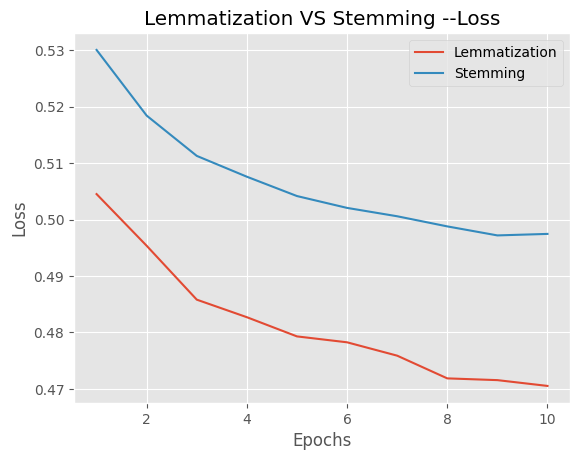

In [ ]:
epochs=[i+1 for i in range(10)]
plt.plot(epochs,history_lem.history['val_loss'],label="Lemmatization")
plt.plot(epochs,history_stem.history['val_loss'],label="Stemming")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Lemmatization VS Stemming --Loss")
plt.show()

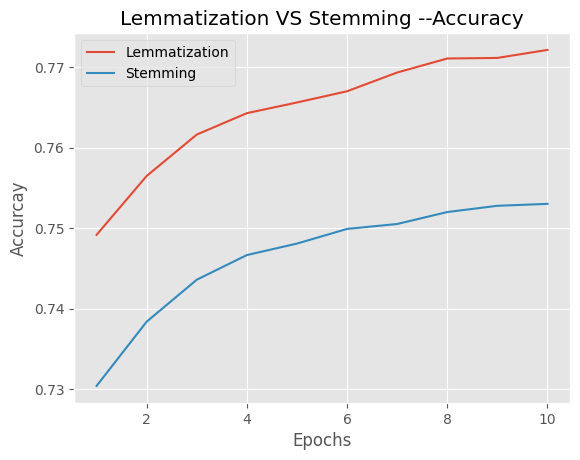

In [ ]:
epochs=[i+1 for i in range(10)]
plt.plot(epochs,history_lem.history['val_accuracy'],label="Lemmatization")
plt.plot(epochs,history_stem.history['val_accuracy'],label="Stemming")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accurcay')
plt.title("Lemmatization VS Stemming --Accuracy")
plt.show()

In [ ]:
del model_stem
del model_lem

## GloVe Vs Word2Vec

Define two models , one will use GloVe word embbeding  and the other will use Word2Vec.

In [ ]:
gc.collect()

30939

In [ ]:
model_word2vec=build_model(WORD2VEC_EMB,vocab_size_lema,word_index_lem,LSTM,bidirectional=True,word2vec=True)
model_glove=build_model(GLOVE_EMB,vocab_size_lema,word_index_lem,LSTM,bidirectional=True,word2vec=False)

number of words that does not exist in word2vec: 131880


In [ ]:
#train using glove emebdding
history_glove = model_glove.fit(x_train_lema, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test_lema, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 152s 110ms/step - loss: 0.5508 - accuracy: 0.7144 - val_loss: 0.5087 - val_accuracy: 0.7479 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 136s 109ms/step - loss: 0.5173 - accuracy: 0.7408 - val_loss: 0.4938 - val_accuracy: 0.7563 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 133s 106ms/step - loss: 0.5064 - accuracy: 0.7488 - val_loss: 0.4860 - val_accuracy: 0.7616 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 132s 106ms/step - loss: 0.4999 - accuracy: 0.7530 - val_loss: 0.4849 - val_accuracy: 0.7641 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 131s 105ms/step - loss: 0.4951 - accuracy: 0.7567 - val_loss: 0.4782 - val_accuracy: 0.7674 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 136s 108ms/step - loss: 0.4913 - accuracy: 0.7593 - val_loss: 0.4771 - val_accuracy: 0.7676 - lr: 0.0010
Epoch 7/10
1250/1250 [============

In [ ]:
#train using word2vec
history_word2vec = model_word2vec.fit(x_train_lema, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test_lema, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 140s 108ms/step - loss: 0.5374 - accuracy: 0.7254 - val_loss: 0.4920 - val_accuracy: 0.7587 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 132s 106ms/step - loss: 0.5055 - accuracy: 0.7499 - val_loss: 0.4820 - val_accuracy: 0.7655 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 132s 106ms/step - loss: 0.4958 - accuracy: 0.7564 - val_loss: 0.4753 - val_accuracy: 0.7687 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 133s 106ms/step - loss: 0.4897 - accuracy: 0.7608 - val_loss: 0.4743 - val_accuracy: 0.7703 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 137s 110ms/step - loss: 0.4861 - accuracy: 0.7631 - val_loss: 0.4731 - val_accuracy: 0.7702 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 133s 106ms/step - loss: 0.4829 - accuracy: 0.7653 - val_loss: 0.4690 - val_accuracy: 0.7724 - lr: 0.0010
Epoch 7/10
1250/1250 [============

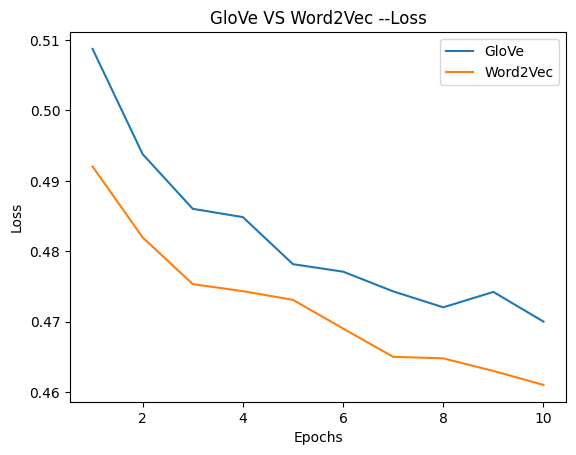

In [ ]:
epochs=[i+1 for i in range(10)]
plt.plot(epochs,history_glove.history['val_loss'],label="GloVe")
plt.plot(epochs,history_word2vec.history['val_loss'],label="Word2Vec")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("GloVe VS Word2Vec --Loss")
plt.show()

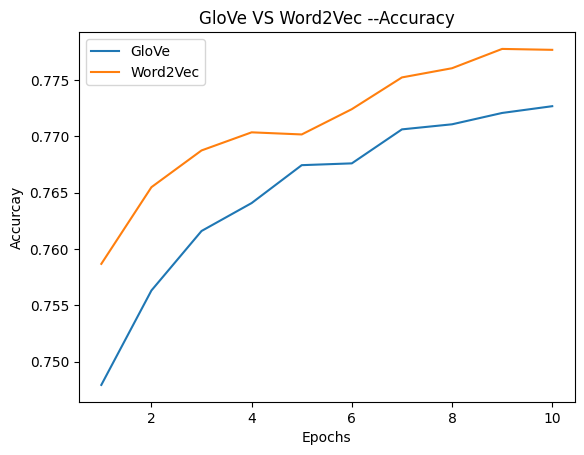

In [ ]:
epochs=[i+1 for i in range(10)]
plt.plot(epochs,history_glove.history['val_accuracy'],label="GloVe")
plt.plot(epochs,history_word2vec.history['val_accuracy'],label="Word2Vec")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accurcay')
plt.title("GloVe VS Word2Vec --Accuracy")
plt.show()

## RNN VS GRU VS LSTM

In [ ]:
del model_word2vec
del model_glove

In [ ]:
gc.collect()

24774

In [ ]:
model_lstm=build_model(WORD2VEC_EMB,vocab_size_lema,word_index_lem,LSTM,bidirectional=True,trainable=False,word2vec=True)
model_rnn=build_model(WORD2VEC_EMB,vocab_size_lema,word_index_lem,SimpleRNN,bidirectional=True,trainable=False,word2vec=True)
model_gru=build_model(WORD2VEC_EMB,vocab_size_lema,word_index_lem,GRU,bidirectional=True,trainable=False,word2vec=True)

number of words that does not exist in word2vec: 131880


number of words that does not exist in word2vec: 131880


number of words that does not exist in word2vec: 131880


In [ ]:
#train using LSTM
history_lstm = model_lstm.fit(x_train_lema, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test_lema, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 141s 109ms/step - loss: 0.5384 - accuracy: 0.7247 - val_loss: 0.4916 - val_accuracy: 0.7586 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 134s 107ms/step - loss: 0.5062 - accuracy: 0.7495 - val_loss: 0.4851 - val_accuracy: 0.7645 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 135s 108ms/step - loss: 0.4966 - accuracy: 0.7566 - val_loss: 0.4756 - val_accuracy: 0.7699 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 135s 108ms/step - loss: 0.4906 - accuracy: 0.7601 - val_loss: 0.4739 - val_accuracy: 0.7708 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 134s 108ms/step - loss: 0.4863 - accuracy: 0.7633 - val_loss: 0.4714 - val_accuracy: 0.7726 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 136s 109ms/step - loss: 0.4832 - accuracy: 0.7646 - val_loss: 0.4674 - val_accuracy: 0.7750 - lr: 0.0010
Epoch 7/10
1250/1250 [============

In [ ]:
#train using RNN
history_rnn = model_rnn.fit(x_train_lema, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test_lema, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 66s 50ms/step - loss: 0.5513 - accuracy: 0.7150 - val_loss: 0.5025 - val_accuracy: 0.7548 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 61s 49ms/step - loss: 0.5152 - accuracy: 0.7449 - val_loss: 0.4892 - val_accuracy: 0.7579 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 61s 49ms/step - loss: 0.5069 - accuracy: 0.7509 - val_loss: 0.4863 - val_accuracy: 0.7640 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 61s 49ms/step - loss: 0.5024 - accuracy: 0.7542 - val_loss: 0.4820 - val_accuracy: 0.7656 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 61s 49ms/step - loss: 0.4994 - accuracy: 0.7561 - val_loss: 0.4799 - val_accuracy: 0.7692 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 62s 49ms/step - loss: 0.4972 - accuracy: 0.7576 - val_loss: 0.4793 - val_accuracy: 0.7681 - lr: 0.0010
Epoch 7/10
1250/1250 [========================

In [ ]:
#train using GRU
history_gru = model_gru.fit(x_train_lema, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test_lema, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 130s 100ms/step - loss: 0.5421 - accuracy: 0.7217 - val_loss: 0.4981 - val_accuracy: 0.7561 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 125s 100ms/step - loss: 0.5067 - accuracy: 0.7492 - val_loss: 0.4807 - val_accuracy: 0.7658 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 124s 99ms/step - loss: 0.4957 - accuracy: 0.7568 - val_loss: 0.4750 - val_accuracy: 0.7703 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 129s 104ms/step - loss: 0.4899 - accuracy: 0.7608 - val_loss: 0.4708 - val_accuracy: 0.7723 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 126s 100ms/step - loss: 0.4858 - accuracy: 0.7631 - val_loss: 0.4678 - val_accuracy: 0.7742 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 126s 100ms/step - loss: 0.4823 - accuracy: 0.7657 - val_loss: 0.4664 - val_accuracy: 0.7759 - lr: 0.0010
Epoch 7/10
1250/1250 [=============

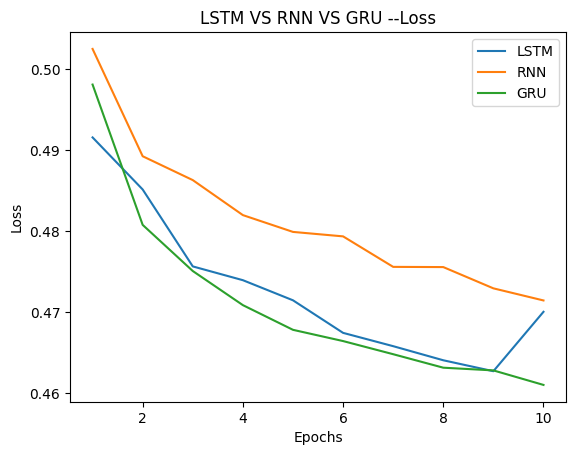

In [ ]:
epochs=[i+1 for i in range(10)]
plt.plot(epochs,history_lstm.history['val_loss'],label="LSTM")
plt.plot(epochs,history_rnn.history['val_loss'],label="RNN")
plt.plot(epochs,history_gru.history['val_loss'],label="GRU")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("LSTM VS RNN VS GRU --Loss")
plt.show()

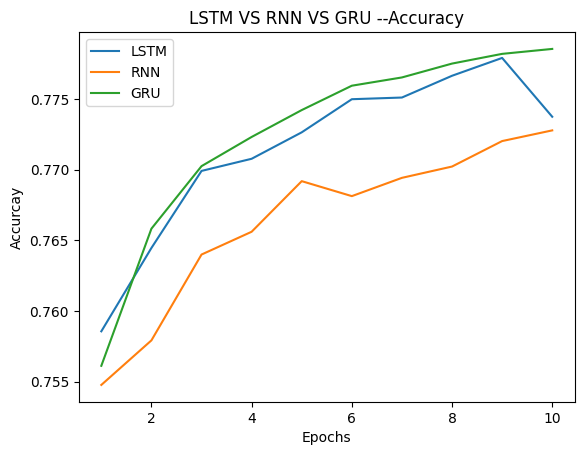

In [ ]:
epochs=[i+1 for i in range(10)]
plt.plot(epochs,history_lstm.history['val_accuracy'],label="LSTM")
plt.plot(epochs,history_rnn.history['val_accuracy'],label="RNN")
plt.plot(epochs,history_gru.history['val_accuracy'],label="GRU")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accurcay')
plt.title("LSTM VS RNN VS GRU --Accuracy")
plt.show()

# Transformers based models (Attention mechanism)

In [23]:
map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
      'bert':"https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
      'bert':"https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
}

In [20]:
!pip install  tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 87.9 MB/s eta 0:00:00


In [21]:
import tensorflow_hub as hub
import tensorflow_text as text

In [24]:
bert_model_name="small_bert/bert_en_uncased_L-4_H-768_A-12"
tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

In [25]:

se

In [28]:
input_text=input=Input((),dtype=tf.string, name='text')
text_model=build_bert_model(input_text,True,True,256)

In [32]:
text_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(2e-5),metrics=["accuracy"])

In [ ]:
hist=text_model.fit(train_data['text'],y=train_data['sentiment'],epochs=3,batch_size=256,validation_data=(test_data['text'],test_data['sentiment']),shuffle=True)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(256, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


   9/5000 [..............................] - ETA: 4:09:08 - loss: 0.0000e+00 - accuracy: 0.5959

In [ ]:
print("Validation loss is :",hist.history['val_loss'][-1])
print("Validation accuracy is :",hist.history['val_accuracy'][-1])
